#### On the dataset 
The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

In [32]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [33]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [34]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

EDA findings:

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Discrete variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in ($000)

* CCAvg - Average credit card spending ($000)
* Mortage - Value of House Mortgage

Other variables:
* Family - Family size of the customer
* Education - Education level of the customer
* ID
* Zip Code

In [35]:
data.shape

(5000, 14)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [37]:
# No columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [38]:
# Understanding distribution
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [39]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

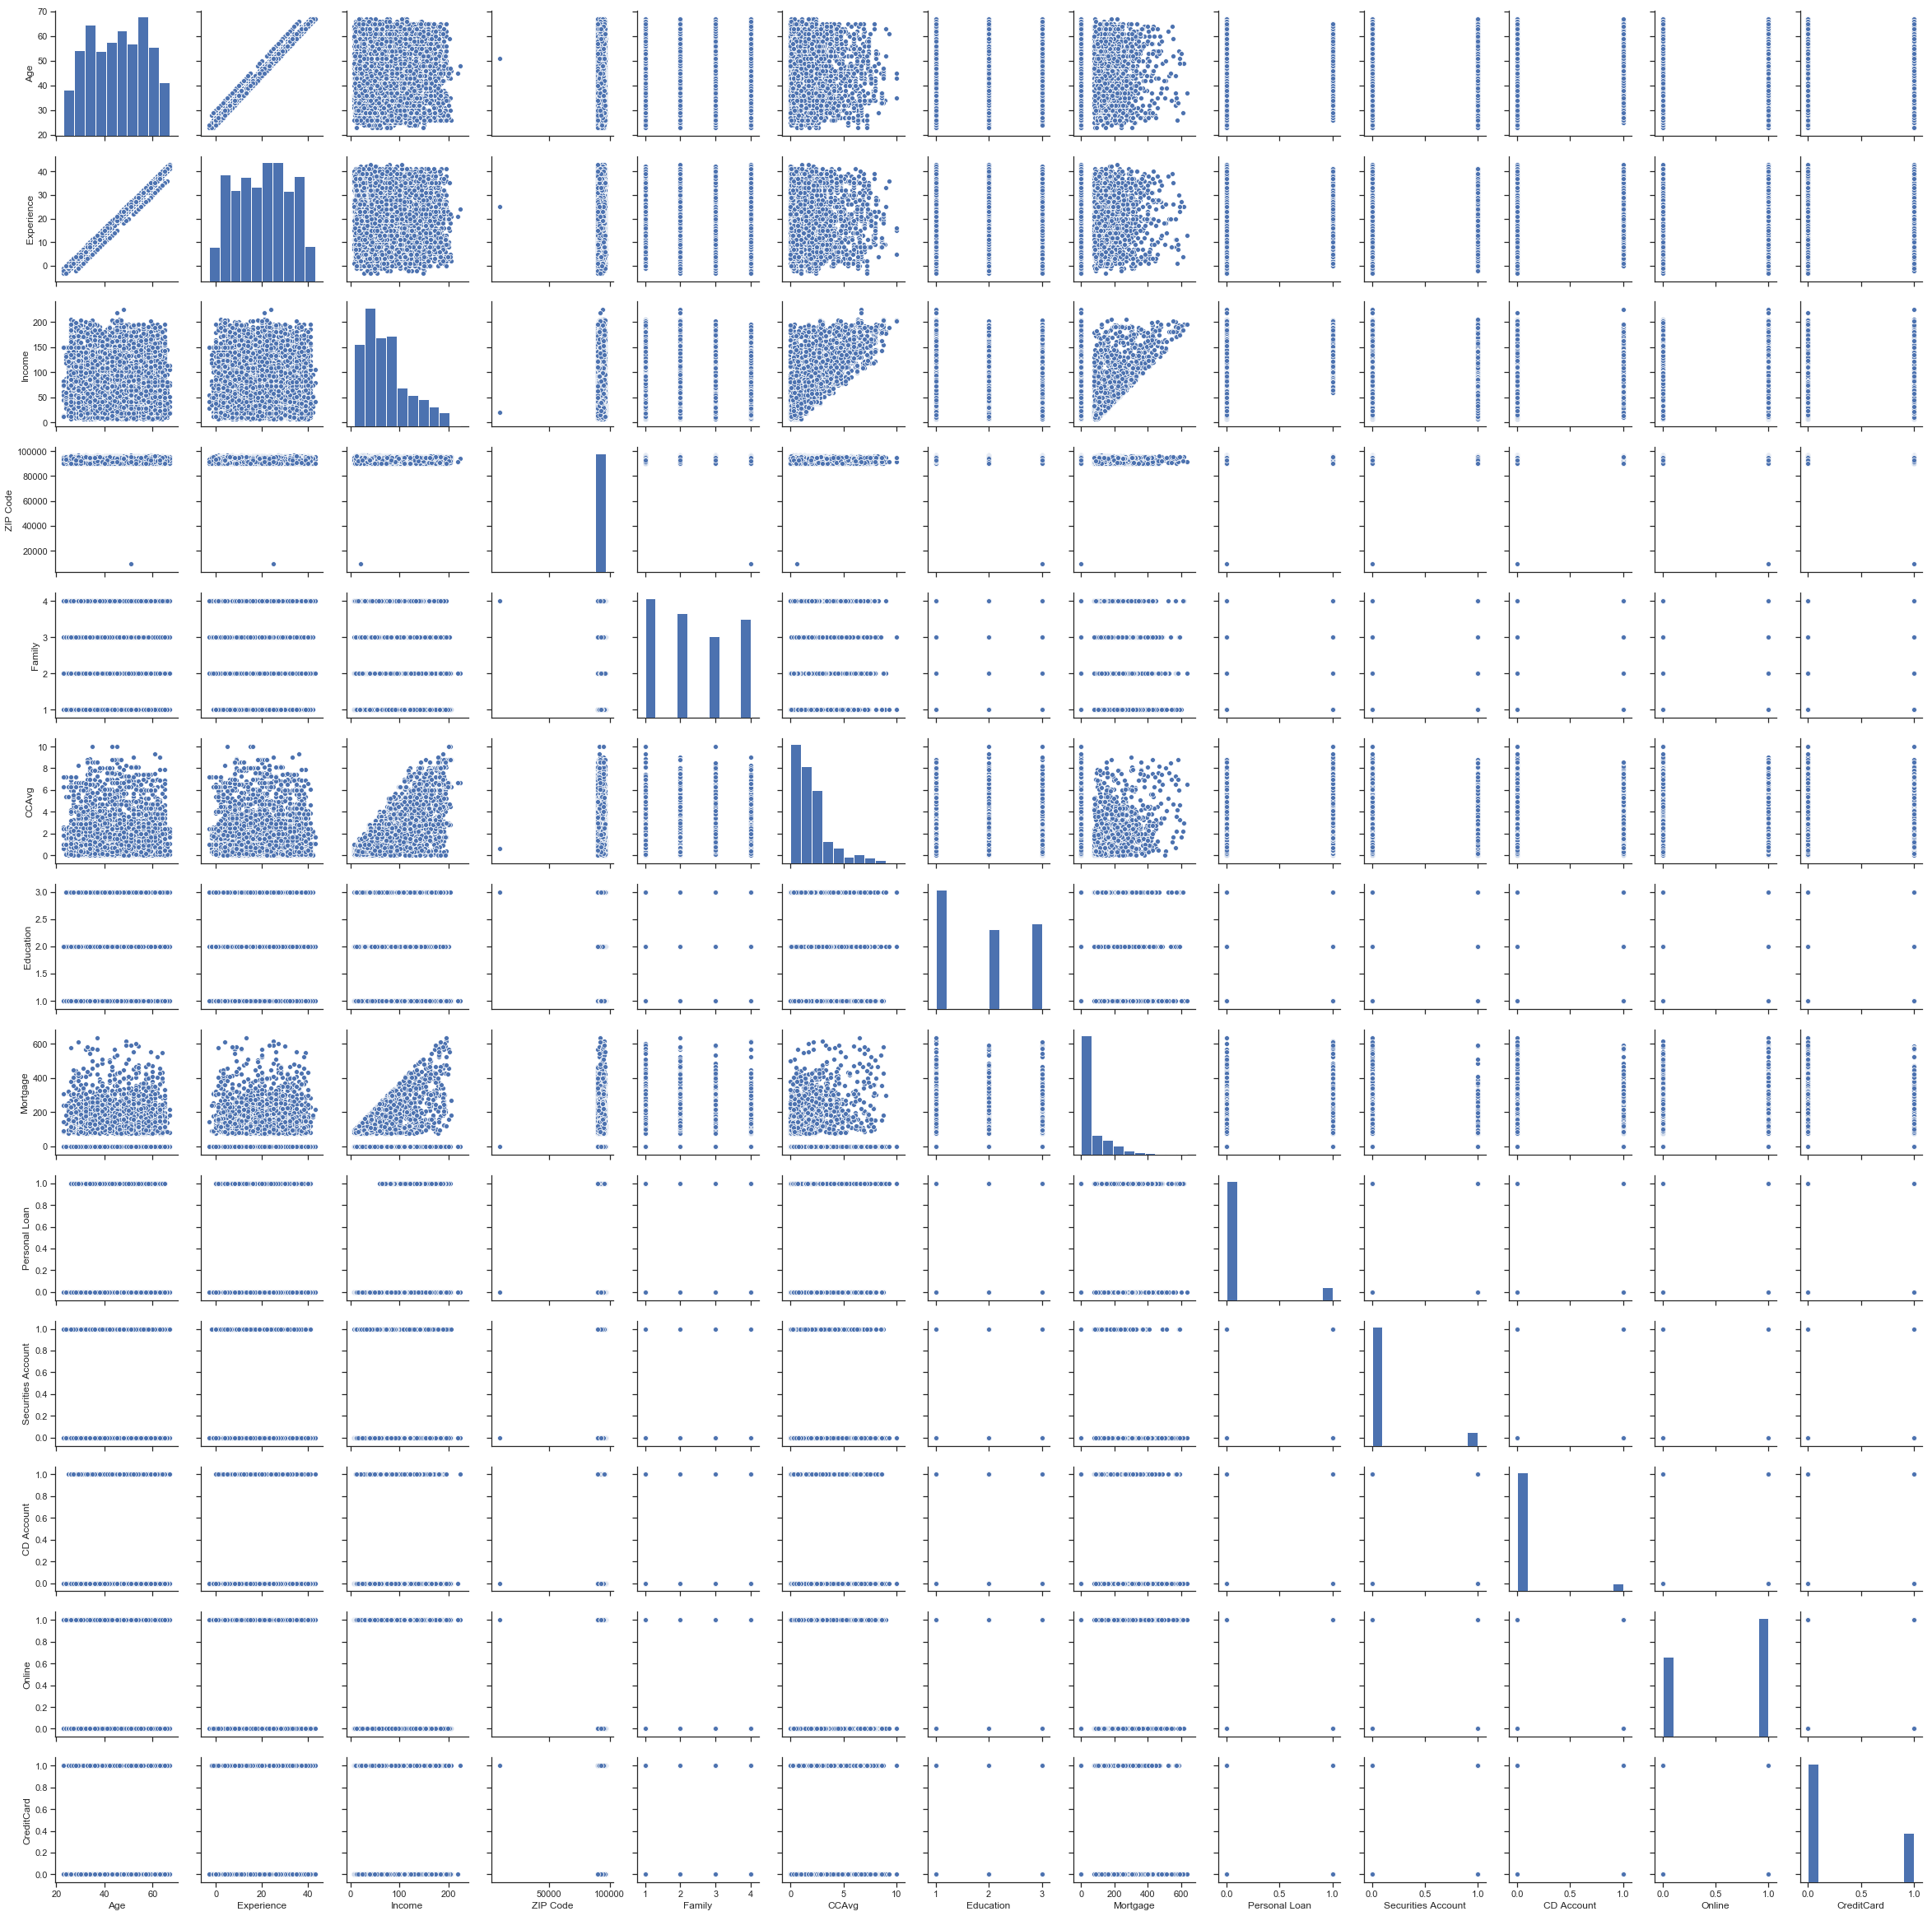

In [40]:
sns.pairplot(data.iloc[:,1:])

/Users/architnarang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


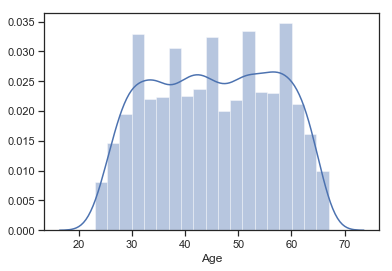

In [41]:
#distribution of customers by age
sns.distplot(data['Age'])

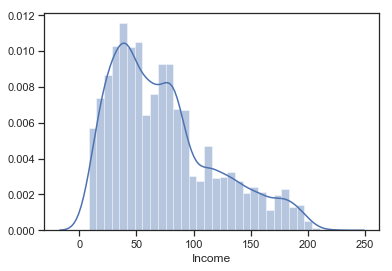

In [42]:
#distribution of customers by income
sns.distplot(data['Income'])

Income, Avg CC Spend and Mortgage are positively skewed. 

This is confirmed from the plot and because mean is greater than median.

Age and Experience are normally distributed with mean almost equal to median.

Majority of customers falling between 30 years and 60 years of age

Majority of the customers have income between 45K and 55K

In [43]:
# there are 52 records with negative experience
data[data['Experience'] < 0]['Experience'].count()

52

In [44]:
#cleaning data
data = data.loc[data['Experience'] >0]

In [45]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

data.describe().transpose()

### Influence of income and education on personal loan 

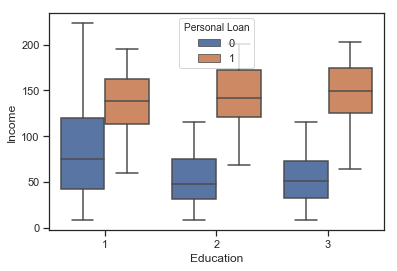

In [46]:
sns.boxplot(x=data['Education'],y=data['Income'],hue=data['Personal Loan'],data=data)

**Observation** : It seems the customers whose education level is least have more income. However customers who has taken the personal loan have the same income levels

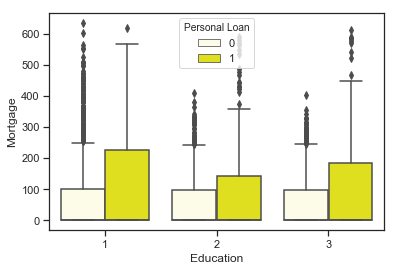

In [47]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

**Inference** : customers who have taken a loan have higher mortage and the lowest education customers have highest mortgage

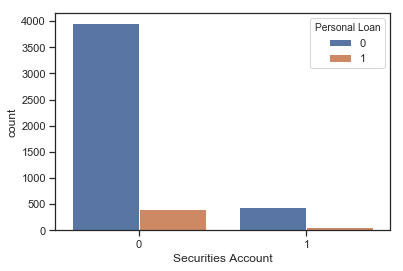

In [20]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

In [21]:
data[data['Securities Account']==1].count()

ID                    508
Age                   508
Experience            508
Income                508
ZIP Code              508
Family                508
CCAvg                 508
Education             508
Mortgage              508
Personal Loan         508
Securities Account    508
CD Account            508
Online                508
CreditCard            508
dtype: int64

**Observation** : Majority of customers do not have a Security Deposit and haven't taken a loan. Most customers haven't taken a loan

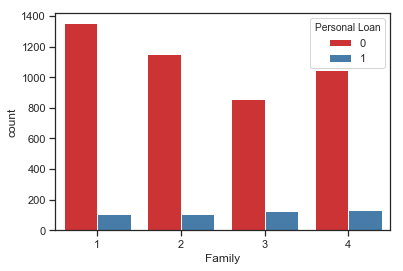

In [48]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

**Observation**: Family size does not have much impact while taking a loan. Bigger family sizes seem to be slightly more skewed to taking one.

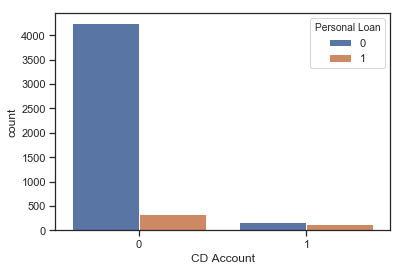

In [23]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

**Observation**: Customers with CD account are more likely to opt for a loan

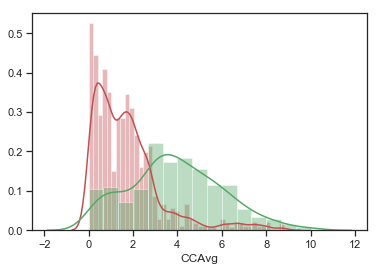

In [24]:
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'], color = 'g')

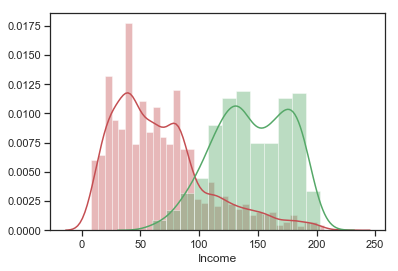

In [25]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['Income'], color = 'g')

In [26]:
print('Credit card spending of Non-Loan customers(in $): ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers(in $)    : ', data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers(in $):  1400.0
Credit card spending of Loan customers(in $)    :  3800.0


**Observation**: Customers who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.  Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

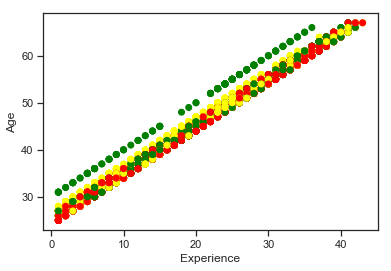

In [27]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

**Observation** Work experience and age are obviously correlated. 

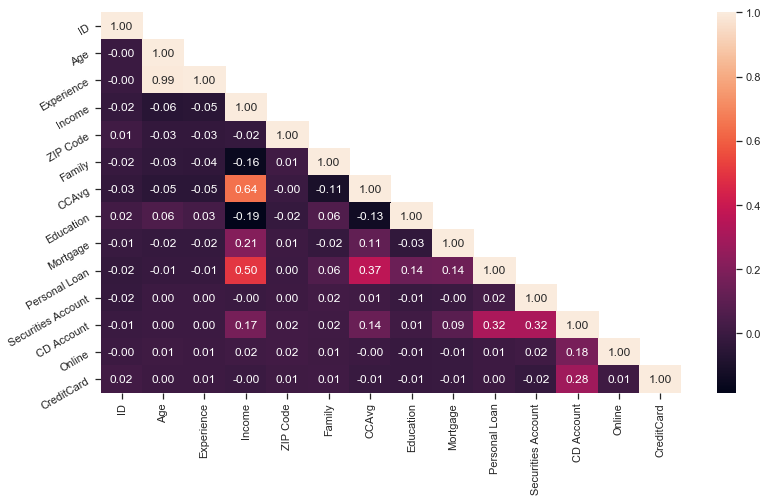

In [28]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation**
* Income and CCAvg is moderately correlated. 
* Age and Experience is highly correlated

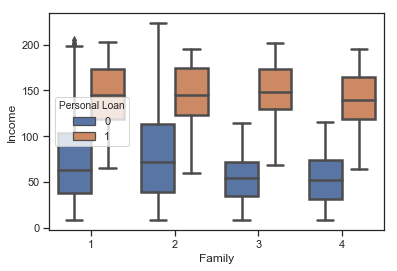

In [29]:
sns.boxplot(x=data.Family,y=data.Income,hue=data['Personal Loan'])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

### Applying models
Split data into train and test

Pop out predicted column

In [49]:
X = data.drop(['ID','Experience'], axis=1)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
x_train, x_test = train_test_split(X, test_size=0.3 , random_state=100)
y_train = x_train.pop("Personal Loan")
y_test = x_test.pop("Personal Loan")

In [61]:
import matplotlib.pyplot as plt 

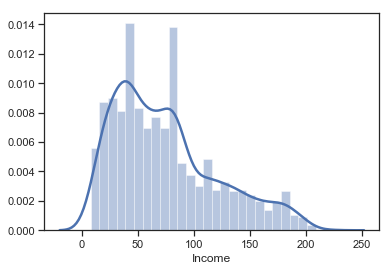

In [32]:
sns.distplot(train_set['Income'])

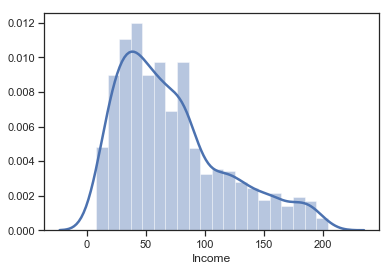

In [33]:
sns.distplot(test_set['Income'])

### Decision tree classifier

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_predict = dt_model.predict(x_test)

#### Performance of Model with test data

In [55]:
#metrics.accuracy_score(x_test , y_test)
dt_model.score(x_test , y_test)

0.9815699658703072

#### Performance with Train Data

In [56]:
dt_model.score(x_train , y_train)

0.9754170324846356

#### Cross Validation

In [76]:
scores = model_selection.cross_val_score(dt_model, x_test, y_test, cv=5)

In [77]:
scores.mean()

0.9849945279902601

#### Confusion Matrix

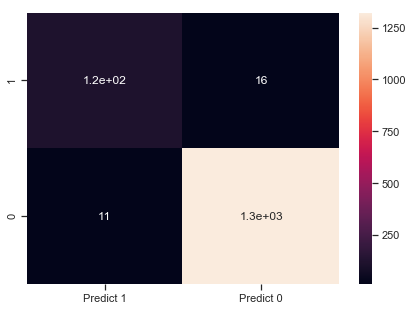

In [62]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [63]:
cm

array([[ 115,   16],
       [  11, 1323]])

#### Reading Confusion Matrix 
True Positives (TP): we correctly predicted that they did opt for a personal loan = 115

True Negatives (TN): we correctly predicted that they did not opt for a personal loan = 1323

False Positives (FP): we incorrectly predicted that they did opt for a personal loan (a "Type II error") = 11 Falsely predict positive Type II error

False Negatives (FN): we incorrectly predicted that they did not opt for a personal loan (a "Type I error") = 16 Falsely predict negative Type I error

### Naive Bayes

In [80]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

y_predict = naive_model.predict(x_test)
naive_model.score(x_test,y_test)

0.898976109215017

In [79]:
scores = model_selection.cross_val_score(naive_model, x_test, y_test, cv=5)
scores.mean()

0.8969371693695946

array([[  76,   55],
       [  93, 1241]])

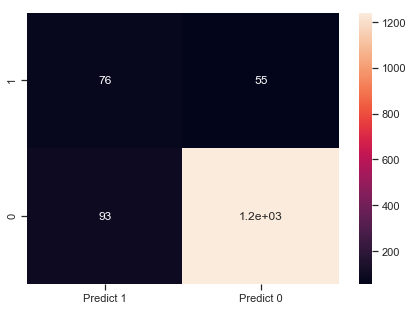

In [82]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
cm

#### Reading Confusion Matrix 
True Positives (TP): we correctly predicted that they did opt for a personal loan = 76

True Negatives (TN): we correctly predicted that they did not opt for a personal loan = 1241

False Positives (FP): we incorrectly predicted that they did opt for a personal loan (a "Type II error") = 93 Falsely predict positive Type II error

False Negatives (FN): we incorrectly predicted that they did not opt for a personal loan (a "Type I error") = 55 Falsely predict negative Type I error

### Logistic Regression

In [67]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=1000).fit(x_train, y_train)

In [69]:
y_predict = clf.predict(x_test)
clf.score(x_test,y_test)

0.910580204778157

In [72]:
scores = model_selection.cross_val_score(clf, x_test, y_test, cv=5)

In [74]:
scores.mean()

0.91809765843782

array([[  43,   88],
       [  43, 1291]])

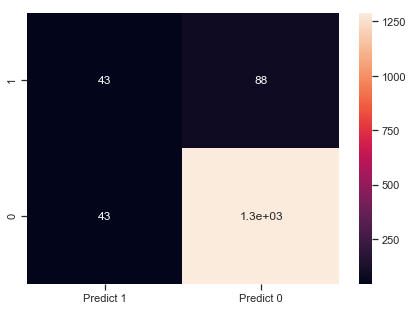

In [71]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
cm

#### Reading Confusion Matrix 
True Positives (TP): we correctly predicted that they did opt for a personal loan = 43

True Negatives (TN): we correctly predicted that they did not opt for a personal loan = 1291

False Positives (FP): we incorrectly predicted that they did opt for a personal loan (a "Type II error") = 43 Falsely predict positive Type II error

False Negatives (FN): we incorrectly predicted that they did not opt for a personal loan (a "Type I error") = 88 Falsely predict negative Type I error

### Random Forest classifier

In [88]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

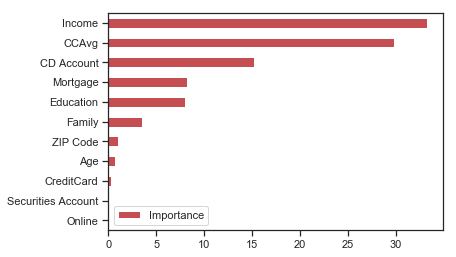

In [89]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [90]:
y_predict=randomforest_model.predict(x_test)
randomforest_model.score(x_test,y_test)

0.9174061433447099

In [91]:
scores = model_selection.cross_val_score(randomforest_model, x_test, y_test, cv=5)
scores.mean()

0.9167208301806861

array([[  10,  121],
       [   0, 1334]])

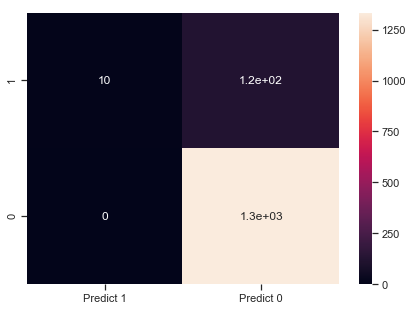

In [92]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
cm

#### Reading Confusion Matrix 
True Positives (TP): we correctly predicted that they did opt for a personal loan = 10

True Negatives (TN): we correctly predicted that they did not opt for a personal loan = 1334

False Positives (FP): we incorrectly predicted that they did opt for a personal loan (a "Type II error") = 0 Falsely predict positive Type II error

False Negatives (FN): we incorrectly predicted that they did not opt for a personal loan (a "Type I error") = 121 Falsely predict negative Type I error

### KNN ( K - Nearest Neighbour )

In [94]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = data["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [95]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9109341057204924


In [97]:
scores = model_selection.cross_val_score(knn, X_Test, Y_Test, cv=5)
scores.mean()

0.9167268351383875

array([[   3,  112],
       [  11, 1255]])

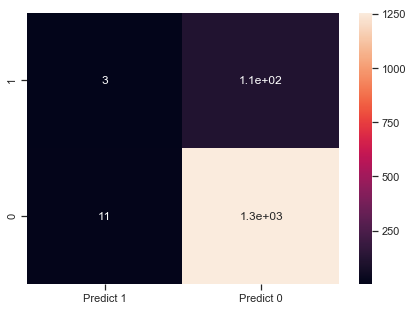

In [98]:
cm=metrics.confusion_matrix(Y_Test, predicted, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
cm

#### Reading Confusion Matrix 
True Positives (TP): we correctly predicted that they did opt for a personal loan = 3

True Negatives (TN): we correctly predicted that they did not opt for a personal loan = 1255

False Positives (FP): we incorrectly predicted that they did opt for a personal loan (a "Type II error") = 11 Falsely predict positive Type II error

False Negatives (FN): we incorrectly predicted that they did not opt for a personal loan (a "Type I error") = 112 Falsely predict negative Type I error

### Model cross validation and comparison

KNN: 0.898360 (0.024771)
CART: 0.980910 (0.010432)
NB: 0.895578 (0.021920)


/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/architnar

RF: 0.982933 (0.007650)
LR: 0.910581 (0.022132)


/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/architnarang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

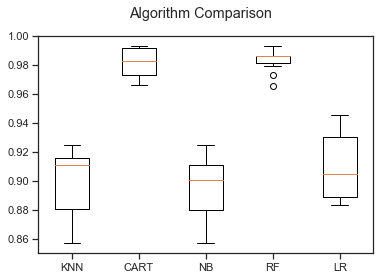

In [99]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion
Five classification algorithms were used in this study. From the above graph , it seems like **Decision Tree** algorithm have the highest accuracy and cross validation score so that is the best option. Decision Tree is giving the least Type I error results, which is crucial since wrongly predicting potential loan takers is costly for the bank, as they can run a campaign on many people.
Out of Logistic Regression, Naive Bayes and KNN - **Logistic Regression** is giving best accuracy but lower cross validation score than Naive Bayes. 